# Data from the Toronto Regional Real Estate Board 
## We need to perform some data cleaning
Let's start and read the CSV

In [ ]:
import pandas as pd

trreb_df = pd.read_csv("TRREB_data_raw.csv")

## Rename columns and drop nulls

In [43]:
# Rename columns for consistency
trreb_df.columns = [col.strip().lower().replace(' ', '_') for col in trreb_df.columns]

# Handle missing values
trreb_df = trreb_df.dropna()  # Drop rows with missing values (or handle differently)

In [44]:
trreb_df.head(20)

,address,beds,baths,type,price,sqft,listing#
0,50 Orchid Place Dr Room 1 Toronto,1,1,Condo Townhouse Multi-Level,1000,1000-1199,E9416947
1,330 Village Green Sq 8 Toronto,1,2,Condo Townhouse 3-Storey,1100,1200-1399,E9399099
2,3 Falaise Rd A2 Toronto,1,1,Condo Townhouse Stacked Townhse,1200,1400-1599,E10431570
3,10 Eddystone Ave 241 Toronto,1,2,Condo Apt 2-Storey,1200,1200-1399,W10407655
4,872 Browns Line 2 Toronto,1,1,Condo Apt Multi-Level,1250,1000-1199,W10423767
5,55 Cedarcroft Blvd 12 Toronto,1,1,Condo Townhouse 2-Storey,1250,1200-1399,C10441325
6,177 Linus Rd 1014 Toronto,1,1,Condo Apt Apartment,1280,900-999,C9295556
7,350 Alton Towers Circ 907 Toronto,1+1,1,Condo Apt Apartment,1300,700-799,E9381394
8,57 Finch Ave 27 Toronto,1,1,Condo Townhouse 2-Storey,1350,900-999,C10884899
9,11753 Sheppard Ave E 420 Toronto,1,1,Condo Apt Apartment,1350,1000-1199,E10422806


## Get sqft range and average

In [45]:
# Get the average
# Split the 'sqft' column into min and max
trreb_df[['sqft_min', 'sqft_max']] = trreb_df['sqft'].str.split('-', expand=True).astype(int)

# Calculate the average
trreb_df['sqft_avg'] = (trreb_df['sqft_min'] + trreb_df['sqft_max']) / 2

In [46]:
trreb_df.head()

,address,beds,baths,type,price,sqft,listing#,sqft_min,sqft_max,sqft_avg
0,50 Orchid Place Dr Room 1 Toronto,1,1,Condo Townhouse Multi-Level,1000,1000-1199,E9416947,1000,1199,1099.5
1,330 Village Green Sq 8 Toronto,1,2,Condo Townhouse 3-Storey,1100,1200-1399,E9399099,1200,1399,1299.5
2,3 Falaise Rd A2 Toronto,1,1,Condo Townhouse Stacked Townhse,1200,1400-1599,E10431570,1400,1599,1499.5
3,10 Eddystone Ave 241 Toronto,1,2,Condo Apt 2-Storey,1200,1200-1399,W10407655,1200,1399,1299.5
4,872 Browns Line 2 Toronto,1,1,Condo Apt Multi-Level,1250,1000-1199,W10423767,1000,1199,1099.5


## Let's see what unique values we have in "type" column and convert

In [47]:
trreb_df['type'].unique()

array(['Condo Townhouse Multi-Level', 'Condo Townhouse 3-Storey',
       'Condo Townhouse Stacked Townhse', 'Condo Apt 2-Storey',
       'Condo Apt Multi-Level', 'Condo Townhouse 2-Storey',
       'Condo Apt Apartment', 'Condo Apt Bachelor/Studio',
       'Room Apartment', 'Room 3-Storey', 'Shared Room Apartment',
       'Upper Level Apartment', 'Other Apartment', 'Co-Op Apt Apartment',
       'Comm Element Condo 2-Storey', 'Co-Ownership Apt Apartment',
       'Comm Element Condo Apartment',
       'Comm Element Condo Bachelor/Studio', 'Condo Apt Loft',
       'Other Multi-Level', 'Condo Apt Other',
       'Condo Townhouse Apartment', 'Comm Element Condo Stacked Townhse',
       'Comm Element Condo Multi-Level', 'Condo Apt Stacked Townhse',
       'Condo Townhouse Loft', 'Co-Op Apt Bachelor/Studio',
       'Condo Apt Industrial Loft', 'Comm Element Condo Other',
       'Comm Element Condo Loft', 'Condo Apt 3-Storey'], dtype=object)

In [48]:
# Mapping rules for 'Type'
type_mapping = {
    'Condo Apt': 'Condo Apartment',
    'Condo Townhouse': 'Condo Townhouse',
    'Room': 'Room',
    'Shared Room': 'Shared Room',
    'Upper Level': 'Upper Level',
    'Co-Op Apt': 'Co-Op Apartment',
    'Co-Ownership Apt': 'Co-Ownership Apartment',
    'Comm Element Condo': 'Common Element Condo',
    'Other': 'Other'
}

# Extract 'Type'
trreb_df['Type'] = trreb_df['type'].apply(lambda x: next((type_mapping[key] for key in type_mapping if key in x), 'Other'))

# Mapping rules for 'Style'
style_mapping = [
    '2-Storey', '3-Storey', 'Apartment', 'Bachelor/Studio', 'Multi-Level', 
    'Stacked Townhse', 'Loft', 'Industrial Loft', 'Other'
]

# Extract 'Style'
def extract_style(value):
    for style in style_mapping:
        if style in value:
            return style
    return 'Other'

trreb_df['Style'] = trreb_df['type'].apply(extract_style)

# Display the resulting DataFrame
trreb_df.head()

,address,beds,baths,type,price,sqft,listing#,sqft_min,sqft_max,sqft_avg,Type,Style
0,50 Orchid Place Dr Room 1 Toronto,1,1,Condo Townhouse Multi-Level,1000,1000-1199,E9416947,1000,1199,1099.5,Condo Townhouse,Multi-Level
1,330 Village Green Sq 8 Toronto,1,2,Condo Townhouse 3-Storey,1100,1200-1399,E9399099,1200,1399,1299.5,Condo Townhouse,3-Storey
2,3 Falaise Rd A2 Toronto,1,1,Condo Townhouse Stacked Townhse,1200,1400-1599,E10431570,1400,1599,1499.5,Condo Townhouse,Stacked Townhse
3,10 Eddystone Ave 241 Toronto,1,2,Condo Apt 2-Storey,1200,1200-1399,W10407655,1200,1399,1299.5,Condo Apartment,2-Storey
4,872 Browns Line 2 Toronto,1,1,Condo Apt Multi-Level,1250,1000-1199,W10423767,1000,1199,1099.5,Condo Apartment,Multi-Level


## The last step is to convert from addres to geometries (lat, long)

## Finally, export the csv as a cleaned file

In [49]:
# Let's export the cleaned .csv

# file name
output_file = "TRREB_data_cleaned.csv"

# Export the DataFrame to a CSV file
trreb_df.to_csv(output_file, index=False)  # index=False prevents writing row numbers as a column

print(f"DataFrame successfully exported to {output_file}")


DataFrame successfully exported to TRREB_data_cleaned.csv


# The code that finally worked, thorugh the google API

Don't run, otherwise it will consume credits!

In [ ]:
# THE ONE THAT FINALLY WORKED

# import pandas as pd
# from geopy.geocoders import GoogleV3

# # Google Maps API key
# api_key = "MY SECRET API KEY"

# # Initialize the geolocator with Google Maps API
# geolocator = GoogleV3(api_key=api_key)

# # Load the CSV file
# input_file = "TRREB_data_cleaned.csv"  # Update with your actual file path
# output_file = "TRREB_data_with_lat_long.csv"  # Output file path
# df = pd.read_csv(input_file)

# # Initialize columns for latitude and longitude
# df['LAT'] = None
# df['LONG'] = None

# # Geocode each address
# for index, row in df.iterrows():
#     try:
#         # Geocode the address
#         location = geolocator.geocode(row['address'], timeout=10)
#         # Extract latitude and longitude
#         if location:
#             df.loc[index, 'LAT'] = location.latitude
#             df.loc[index, 'LONG'] = location.longitude
#             print(f"Geocoded: {row['address']} -> LAT: {location.latitude}, LONG: {location.longitude}")
#         else:
#             print(f"Address not found: {row['address']}")
#             df.loc[index, 'LAT'] = None
#             df.loc[index, 'LONG'] = None
#     except Exception as e:
#         print(f"Error geocoding address: {row['address']} - {e}")
#         df.loc[index, 'LAT'] = None
#         df.loc[index, 'LONG'] = None

# # Save the DataFrame with LAT and LONG columns
# df.to_csv(output_file, index=False)
# print(f"Geocoding completed. Results saved to {output_file}")


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Configure Notebook
%matplotlib inline 
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

In [3]:
trreb_final = pd.read_csv('TRREB_data_with_lat_long.csv')

In [4]:
trreb_final.head()

,address,beds,baths,type,price,sqft,listing#,sqft_min,sqft_max,sqft_avg,Type,Style,LAT,LONG
0,50 Orchid Place Dr Room 1 Toronto,1,1,Condo Townhouse Multi-Level,1000,1000-1199,E9416947,1000,1199,1099.5,Condo Townhouse,Multi-Level,43.793200,-79.236894
1,330 Village Green Sq 8 Toronto,1,2,Condo Townhouse 3-Storey,1100,1200-1399,E9399099,1200,1399,1299.5,Condo Townhouse,3-Storey,43.778137,-79.282508
2,3 Falaise Rd A2 Toronto,1,1,Condo Townhouse Stacked Townhse,1200,1400-1599,E10431570,1400,1599,1499.5,Condo Townhouse,Stacked Townhse,43.769318,-79.188958
3,10 Eddystone Ave 241 Toronto,1,2,Condo Apt 2-Storey,1200,1200-1399,W10407655,1200,1399,1299.5,Condo Apartment,2-Storey,43.749246,-79.516705
4,872 Browns Line 2 Toronto,1,1,Condo Apt Multi-Level,1250,1000-1199,W10423767,1000,1199,1099.5,Condo Apartment,Multi-Level,43.609880,-79.549310


In [6]:
trreb_final.describe()

,baths,price,sqft_min,sqft_max,sqft_avg,LAT,LONG
count,3356.000000,3356.000000,3356.000000,3356.000000,3356.000000,3355.000000,3355.000000
mean,1.116508,2496.462157,501.966627,656.166269,579.066448,43.677548,-79.393803
std,0.327318,363.113788,223.311362,128.252210,168.865235,0.046071,0.049346
min,0.000000,1000.000000,0.000000,499.000000,249.500000,43.589824,-79.616653
25%,1.000000,2300.000000,500.000000,599.000000,549.500000,43.645090,-79.405942
50%,1.000000,2450.000000,500.000000,599.000000,549.500000,43.659111,-79.390994
75%,1.000000,2650.000000,600.000000,699.000000,649.500000,43.705994,-79.376975
max,4.000000,5500.000000,2500.000000,2749.000000,2624.500000,43.824809,-79.148316


In [7]:
# Load the shapefile (use the path to the .shp file)
neighbourhoods = gpd.read_file('Neighbourhoods - 4326.shp')

In [10]:
# Perform a spatial join to add the neighborhood name (from AREA_NA7) to each apartment
geometry = [Point(xy) for xy in zip(trreb_final['LONG'], trreb_final['LAT'])]
trreb_final = gpd.GeoDataFrame(trreb_final, geometry=geometry, crs='EPSG:4326')
joined_df = gpd.sjoin(trreb_final, neighbourhoods, how="left", predicate="within")

# Assign the neighborhood name from AREA_NA7 to a new column in the filtered DataFrame
trreb_final['Neighbourhood'] = joined_df['AREA_NA7']

In [11]:
# Define the neighborhood ranking as a dictionary
neighbourhood_ranking = {
    'Danforth': 1,
    'West Queen West': 2,
    'Runnymede-Bloor West Village': 3,
    'Avondale': 4,
    'Wellington Place': 5,
    'Yonge-Doris': 6,
    'Cabbagetown-South St.James Town': 7,
    'Bay-Cloverhill': 8,
    'Palmerston-Little Italy': 9,
    'Trinity-Bellwoods': 10,
    'Bridle Path-Sunnybrook-York Mills': 11,
    'Annex': 12,
    'North Riverdale': 13,
    'Mount Pleasant East': 14,
    'Lawrence Park North': 15,
    'Kingsway South': 16,
    'University': 17,
    'Yonge-Bay Corridor': 18,
    'Leaside-Bennington': 19,
    'South Eglinton-Davisville': 20,
    'Harbourfront-CityPlace': 21,
    'Wychwood': 22,
    'Dovercourt Village': 23,
    'Blake-Jones': 24,
    'Roncesvalles': 25,
    'Dufferin Grove': 26,
    'Lawrence Park South': 27,
    'Church-Wellesley': 28,
    'Casa Loma': 29,
    'Woodbine-Lumsden': 30,
    'Danforth East York': 31,
    'Regent Park': 32,
    'Lansing-Westgate': 33,
    'Downtown Yonge East': 34,
    'St Lawrence-East Bayfront-The Islands': 35,
    'Yonge-Eglinton': 36,
    'High Park-Swansea': 37,
    'Little Portugal': 38,
    'Forest Hill South': 39,
    'Playter Estates-Danforth': 40,
    'Junction Area': 41,
    'Woodbine Corridor': 42,
    'The Beaches': 43,
    'Rosedale-Moore Park': 44,
    'Old East York': 45,
    'Bedford Park-Nortown': 46,
    'High Park North': 47,
    'Kensington-Chinatown': 48,
    'Yonge-St.Clair': 49,
    'Junction-Wallace Emerson': 50,
    'Princess-Rosethorn': 51,
    'Fort York-Liberty Village': 52,
    'North St.James Town': 53,
    'Willowdale West': 54,
    'North Toronto': 55,
    'Greenwood-Coxwell': 56,
    'Bayview Village': 57,
    'South Riverdale': 58,
    'Humewood-Cedarvale': 59,
    'East End-Danforth': 60,
    'Taylor-Massey': 61,
    'East Willowdale': 62,
    'Corso Italia-Davenport': 63,
    'Etobicoke City Centre': 64,
    'Stonegate-Queensway': 65,
    'Centennial Scarborough': 66,
    'Hillcrest Village': 67,
    'Humber Bay Shores': 68,
    'Moss Park': 69,
    'Broadview North': 70,
    'Morningside Heights': 71,
    'Lambton Baby Point': 72,
    'Newtonbrook East': 73,
    'Malvern West': 74,
    'Forest Hill North': 75,
    'Clanton Park': 76,
    'Pleasant View': 77,
    'Banbury-Don Mills': 78,
    'Malvern East': 79,
    'Islington': 80,
    'Markland Wood': 81,
    'Highland Creek': 82,
    'Agincourt North': 83,
    'Edenbridge-Humber Valley': 84,
    'East L\'Amoreaux': 85,
    'Alderwood': 86,
    'Milliken': 87,
    'Henry Farm': 88,
    'Steeles': 89,
    'St.Andrew-Windfields': 90,
    'Pelmo Park-Humberlea': 91,
    'Guildwood': 92,
    'Oakwood Village': 93,
    'Agincourt South-Malvern West': 94,
    'Birchcliffe-Cliffside': 95,
    'Clairlea-Birchmount': 96,
    'Englemount-Lawrence': 97,
    'West Rouge': 98,
    'Tam O\'Shanter-Sullivan': 99,
    'Briar Hill-Belgravia': 100,
    'Bayview Woods-Steeles': 101,
    'Weston-Pelham Park': 102,
    'Bathurst Manor': 103,
    'Woburn North': 104,
    'Bendale South': 105,
    'Newtonbrook West': 106,
    'L\'Amoreaux West': 107,
    'Eringate-Centennial-West Deane': 108,
    'Flemingdon Park': 109,
    'Westminster-Branson': 110,
    'Don Valley Village': 111,
    'Long Branch': 112,
    'Caledonia-Fairbank': 113,
    'Humber Heights-Westmount': 114,
    'Parkwoods-O\'Connor Hills': 115,
    'Rockcliffe-Smythe': 116,
    'Thistletown-Beaumond Heights': 117,
    'Keelesdale-Eglinton West': 118,
    'Maple Leaf': 119,
    'O\'Connor-Parkview': 120,
    'Etobicoke West Mall': 121,
    'Morningside': 122,
    'Mimico-Queensway': 123,
    'Bendale-Glen Andrew': 124,
    'Oakridge': 125,
    'Dorset Park': 126,
    'Thorncliffe Park': 127,
    'Wexford/Maryvale': 128,
    'Victoria Village': 129,
    'Elms-Old Rexdale': 130,
    'Cliffcrest': 131,
    'Humbermede': 132,
    'Mount Dennis': 133,
    'Ionview': 134,
    'Willowridge-Martingrove-Richview': 135,
    'Downsview': 136,
    'Kingsview Village-The Westway': 137,
    'Eglinton East': 138,
    'Fenside-Parkwoods': 139,
    'Yorkdale-Glen Park': 140,
    'Mount Olive-Silverstone-Jamestown': 141,
    'West Humber-Clairville': 142,
    'Glenfield-Jane Heights': 143,
    'South Parkdale': 144,
    'York University Heights': 145,
    'New Toronto': 146,
    'Golfdale-Cedarbrae-Woburn': 147,
    'Brookhaven-Amesbury': 148,
    'Rexdale-Kipling': 149,
    'Rustic': 150,
    'Humber Summit': 151,
    'Scarborough Village': 152,
    'Beechborough-Greenbrook': 153,
    'Oakdale-Beverley Heights': 154,
    'Weston': 155,
    'West Hill': 156,
    'Black Creek': 157,
    'Kennedy Park': 158
}

# Map the ranks to the 'Neighbourhood' column in filtered_gdf
trreb_final['Neighbourhood Rank'] = trreb_final['Neighbourhood'].map(neighbourhood_ranking)

In [12]:
# Droping the geometry column
trreb_final = trreb_final.drop(columns='geometry')

In [15]:
trreb_final.head()

,address,beds,baths,type,price,sqft,listing#,sqft_min,sqft_max,sqft_avg,Type,Style,LAT,LONG,Neighbourhood,Neighbourhood Rank
0,50 Orchid Place Dr Room 1 Toronto,1,1,Condo Townhouse Multi-Level,1000,1000-1199,E9416947,1000,1199,1099.5,Condo Townhouse,Multi-Level,43.793200,-79.236894,Malvern East,79.0
1,330 Village Green Sq 8 Toronto,1,2,Condo Townhouse 3-Storey,1100,1200-1399,E9399099,1200,1399,1299.5,Condo Townhouse,3-Storey,43.778137,-79.282508,Agincourt South-Malvern West,94.0
2,3 Falaise Rd A2 Toronto,1,1,Condo Townhouse Stacked Townhse,1200,1400-1599,E10431570,1400,1599,1499.5,Condo Townhouse,Stacked Townhse,43.769318,-79.188958,West Hill,156.0
3,10 Eddystone Ave 241 Toronto,1,2,Condo Apt 2-Storey,1200,1200-1399,W10407655,1200,1399,1299.5,Condo Apartment,2-Storey,43.749246,-79.516705,Glenfield-Jane Heights,143.0
4,872 Browns Line 2 Toronto,1,1,Condo Apt Multi-Level,1250,1000-1199,W10423767,1000,1199,1099.5,Condo Apartment,Multi-Level,43.609880,-79.549310,Alderwood,86.0


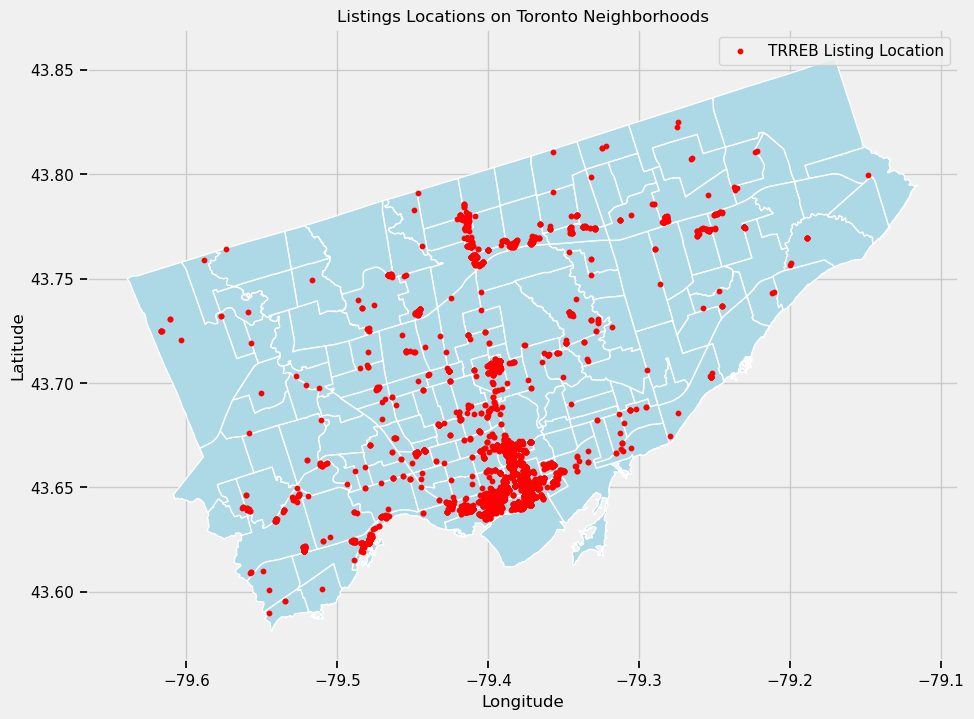

In [17]:
# Plot neighborhoods
fig, ax = plt.subplots(figsize=(10, 10))
neighbourhoods.plot(ax=ax, color='lightblue', edgecolor='white')

# Plot listings' locations
plt.scatter(trreb_final['LONG'],trreb_final['LAT'], color='red', s=10, label="TRREB Listing Location")

# Add labels and legend
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.title("Listings Locations on Toronto Neighborhoods")

plt.show()

In [18]:
# Let's export the final .csv

# file name
output_file = "TRREB_data_final.csv"

# Export the DataFrame to a CSV file
trreb_final.to_csv(output_file, index=False)  # index=False prevents writing row numbers as a column

print(f"DataFrame successfully exported to {output_file}")

DataFrame successfully exported to TRREB_data_final.csv
